Supervised Learning Electricity Demand Prediction Model - Buhari Adamu

In [37]:
import pandas as pd

In [38]:
file_name1="electricity demand dataset.csv"

try:
    data=pd.read_csv(file1)
    print(f"The file \"{file_name1}\" has been loaded succesfully.")
except Exception as e:
    print(f"An error has occured while loading the file {file_name1}:\n{e}")


The file "electricity demand dataset.csv" has been loaded succesfully.


Dataset Analysis and Preparation

In [39]:
data

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [41]:
data["Timestamp"]=pd.to_datetime(data["Timestamp"])

C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_17640\1402059007.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Timestamp"]=pd.to_datetime(data["Timestamp"])


In [42]:
data=data.set_index("Timestamp")

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43848 entries, 2020-01-01 to 2024-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43837 non-null  float64
 1   dayofweek    43839 non-null  float64
 2   month        43840 non-null  float64
 3   year         43843 non-null  float64
 4   dayofyear    43843 non-null  float64
 5   Temperature  43841 non-null  float64
 6   Humidity     43838 non-null  float64
 7   Demand       43841 non-null  float64
dtypes: float64(8)
memory usage: 3.0 MB


In [44]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [45]:
data.isna()

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,False,False,False,False,False,False,False,False
2020-01-01,False,False,False,False,False,False,False,False
2020-01-01,False,False,False,False,False,False,False,False
2020-01-01,False,False,False,False,False,False,False,False
2020-01-01,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2024-12-31,False,False,False,False,False,False,False,False
2024-12-31,False,False,False,False,False,False,False,False
2024-12-31,False,False,False,False,False,False,False,False


In [46]:
data.isna().sum()

hour           11
dayofweek       9
month           8
year            5
dayofyear       5
Temperature     7
Humidity       10
Demand          7
dtype: int64

In [47]:
data[data.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-04-30,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
2020-07-21,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-27,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
2021-12-13,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
2021-12-14,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612


In [48]:
data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data=data.dropna(how="all")

In [50]:
data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,


In [51]:
data["hour"].head(30)

Timestamp
2020-01-01     0.0
2020-01-01     1.0
2020-01-01     2.0
2020-01-01     3.0
2020-01-01     4.0
2020-01-01     5.0
2020-01-01     6.0
2020-01-01     7.0
2020-01-01     8.0
2020-01-01     9.0
2020-01-01    10.0
2020-01-01    11.0
2020-01-01    12.0
2020-01-01    13.0
2020-01-01    14.0
2020-01-01    15.0
2020-01-01    16.0
2020-01-01    17.0
2020-01-01    18.0
2020-01-01    19.0
2020-01-01    20.0
2020-01-01    21.0
2020-01-01    22.0
2020-01-01    23.0
2020-01-02     0.0
2020-01-02     1.0
2020-01-02     2.0
2020-01-02     3.0
2020-01-02     4.0
2020-01-02     5.0
Name: hour, dtype: float64

In [52]:
data["hour"]=data["hour"].interpolate(method="linear")

C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_17640\442612982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["hour"]=data["hour"].interpolate(method="linear")


In [53]:
data[["dayofweek", "month", "year", "dayofyear"]].head(30)

,dayofweek,month,year,dayofyear
Timestamp,,,,
2020-01-01,2.0,1.0,2020.0,1.0
2020-01-01,2.0,1.0,2020.0,1.0
2020-01-01,2.0,1.0,2020.0,1.0
2020-01-01,2.0,1.0,2020.0,1.0
2020-01-01,2.0,1.0,2020.0,1.0
2020-01-01,2.0,1.0,2020.0,1.0
2020-01-01,2.0,1.0,2020.0,1.0
2020-01-01,2.0,1.0,2020.0,1.0
2020-01-01,2.0,1.0,2020.0,1.0


In [54]:
data[["dayofweek", "month", "year", "dayofyear"]]=data[["dayofweek", "month", "year", "dayofyear"]].ffill().bfill()

C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_17640\3731655346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["dayofweek", "month", "year", "dayofyear"]]=data[["dayofweek", "month", "year", "dayofyear"]].ffill().bfill()


In [55]:
data[["Temperature", "Humidity", "Demand"]].head(30)

,Temperature,Humidity,Demand
Timestamp,,,
2020-01-01,3.000000,61.288951,2457.119872
2020-01-01,3.000000,52.873702,2269.904712
2020-01-01,4.244482,36.341783,2215.640403
2020-01-01,3.000000,72.629378,2174.232413
2020-01-01,3.881208,90.582444,2472.453006
2020-01-01,10.822571,67.753433,3104.845505
2020-01-01,6.306673,94.912591,3759.476912
2020-01-01,7.464640,74.456860,4114.486001
2020-01-01,14.746876,66.725005,4575.159503


In [56]:
data[["Temperature", "Humidity", "Demand"]]=data[["Temperature", "Humidity", "Demand"]].interpolate(method="time")

C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_17640\1439796435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["Temperature", "Humidity", "Demand"]]=data[["Temperature", "Humidity", "Demand"]].interpolate(method="time")


In [57]:
data.insert(5, "weekofyear", data.index.isocalendar().week.astype(int))

In [58]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,1,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,1,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,1,3.000000,40.565916,4015.979957


In [59]:
data.insert(6, "weekend", data.index.dayofweek.isin([5,6]).astype(int))

In [60]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,1,0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,1,0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,1,0,3.000000,40.565916,4015.979957


In [61]:
data.insert(7, "quarter", data.index.quarter)

In [62]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,0,1,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,0,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,1,0,4,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,1,0,4,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,1,0,4,3.000000,40.565916,4015.979957


Final Check for Null Values

In [63]:
data[data.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,


Creating Lagged Features

In [64]:
data.insert(11, "Demand_Lag_1H", data["Demand"].shift(1))

In [65]:
data.insert(12, "Demand_Lag_24H", data["Demand"].shift(24))

In [66]:
data.insert(13, "Demand_Lag_1W", data["Demand"].shift(168))

In [67]:
data.insert(14, "Demand_Lag_1M", data["Demand"].shift(672))

In [68]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature,Humidity,Demand,Demand_Lag_1H,Demand_Lag_24H,Demand_Lag_1W,Demand_Lag_1M
Timestamp,,,,,,,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,52.873702,2269.904712,2457.119872,NaN,NaN,NaN
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,0,1,4.244482,36.341783,2215.640403,2269.904712,NaN,NaN,NaN
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,72.629378,2174.232413,2215.640403,NaN,NaN,NaN
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,0,1,3.881208,90.582444,2472.453006,2174.232413,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,1,0,4,3.956838,43.287161,4689.693109,5230.067391,5102.077310,5105.730509,5190.816729
2024-12-31,20.0,1.0,12.0,2024.0,366.0,1,0,4,3.118824,51.705756,4331.249224,4689.693109,4187.844204,4673.672173,4556.916590
2024-12-31,21.0,1.0,12.0,2024.0,366.0,1,0,4,3.000000,40.565916,4015.979957,4331.249224,3859.260701,3856.359014,4030.692288


In [69]:
data.insert(15, "Rolling_Mean_24H_(Demand)", data["Demand"].rolling(window=24).mean())

In [70]:
data.insert(16, "Rolling_Std_24H_(Demand)", data["Demand"].rolling(window=24).std())

In [71]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature,Humidity,Demand,Demand_Lag_1H,Demand_Lag_24H,Demand_Lag_1W,Demand_Lag_1M,Rolling_Mean_24H_(Demand),Rolling_Std_24H_(Demand)
Timestamp,,,,,,,,,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,52.873702,2269.904712,2457.119872,NaN,NaN,NaN,NaN,NaN
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,0,1,4.244482,36.341783,2215.640403,2269.904712,NaN,NaN,NaN,NaN,NaN
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,72.629378,2174.232413,2215.640403,NaN,NaN,NaN,NaN,NaN
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,0,1,3.881208,90.582444,2472.453006,2174.232413,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,1,0,4,3.956838,43.287161,4689.693109,5230.067391,5102.077310,5105.730509,5190.816729,4039.969992,976.961312
2024-12-31,20.0,1.0,12.0,2024.0,366.0,1,0,4,3.118824,51.705756,4331.249224,4689.693109,4187.844204,4673.672173,4556.916590,4045.945201,978.342615
2024-12-31,21.0,1.0,12.0,2024.0,366.0,1,0,4,3.000000,40.565916,4015.979957,4331.249224,3859.260701,3856.359014,4030.692288,4052.475170,977.565114


Addressing New Null Values

In [72]:
data[data.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature,Humidity,Demand,Demand_Lag_1H,Demand_Lag_24H,Demand_Lag_1W,Demand_Lag_1M,Rolling_Mean_24H_(Demand),Rolling_Std_24H_(Demand)
Timestamp,,,,,,,,,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,52.873702,2269.904712,2457.119872,NaN,NaN,NaN,NaN,NaN
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,0,1,4.244482,36.341783,2215.640403,2269.904712,NaN,NaN,NaN,NaN,NaN
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,0,1,3.000000,72.629378,2174.232413,2215.640403,NaN,NaN,NaN,NaN,NaN
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,0,1,3.881208,90.582444,2472.453006,2174.232413,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-28,19.0,1.0,1.0,2020.0,28.0,5,0,1,8.184502,34.241136,4785.531570,5386.457383,4903.680416,4624.308794,NaN,3940.761407,1085.604766
2020-01-28,20.0,1.0,1.0,2020.0,28.0,5,0,1,3.000000,27.921286,3798.356043,4785.531570,4302.162867,4130.560314,NaN,3919.769456,1083.180897
2020-01-28,21.0,1.0,1.0,2020.0,28.0,5,0,1,3.000000,48.383111,3781.568275,3798.356043,3909.241047,3759.442319,NaN,3914.449757,1083.548302


In [73]:
data=data.dropna()

In [74]:
data[data.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature,Humidity,Demand,Demand_Lag_1H,Demand_Lag_24H,Demand_Lag_1W,Demand_Lag_1M,Rolling_Mean_24H_(Demand),Rolling_Std_24H_(Demand)
Timestamp,,,,,,,,,,,,,,,,,


Data Visualization

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Electricity Demand 2020-2025'}, xlabel='Timestamp', ylabel='Electricity Demand'>

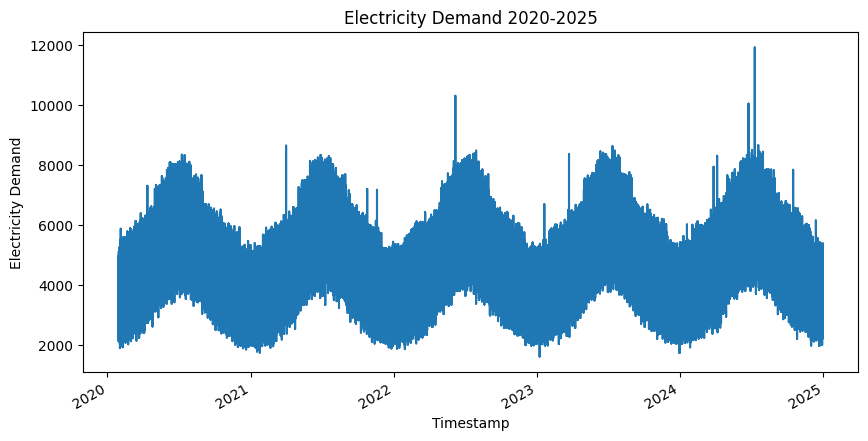

In [81]:
data["Demand"].plot(title="Electricity Demand 2020-2025", ylabel="Electricity Demand", figsize=(10,5))

Text(0, 0.5, 'Electricity Demand')

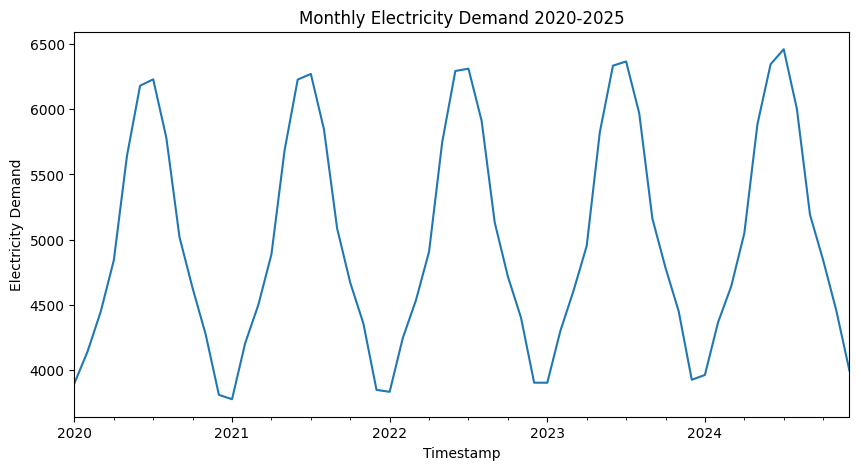

In [96]:
plt.figure(figsize=(10,5))

monthly_demand=data["Demand"].resample("ME").mean()
monthly_demand.plot()
plt.title("Monthly Electricity Demand 2020-2025")
plt.ylabel("Electricity Demand")

Text(0.5, 0, 'Year')

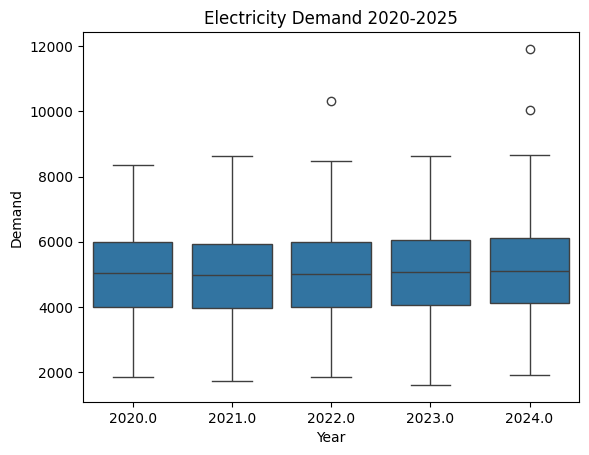

In [98]:
sns.boxplot(data=data, x="year", y="Demand")
plt.title("Electricity Demand 2020-2025")
plt.xlabel("Year")

Text(0.5, 1.0, 'Electricity Demand Scatterplot')

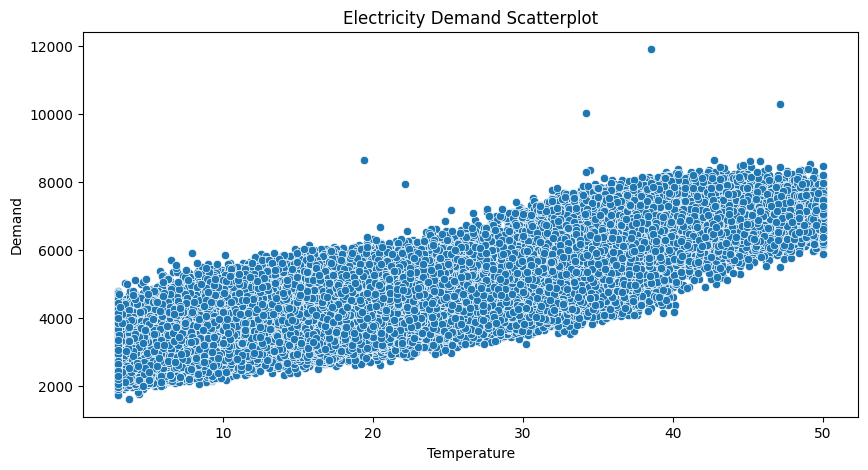

In [104]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x="Temperature", y="Demand")
plt.title("Temperature vs Demand Scatterplot")

Text(0.5, 1.0, 'Humidity vs Demand Scatterplot')

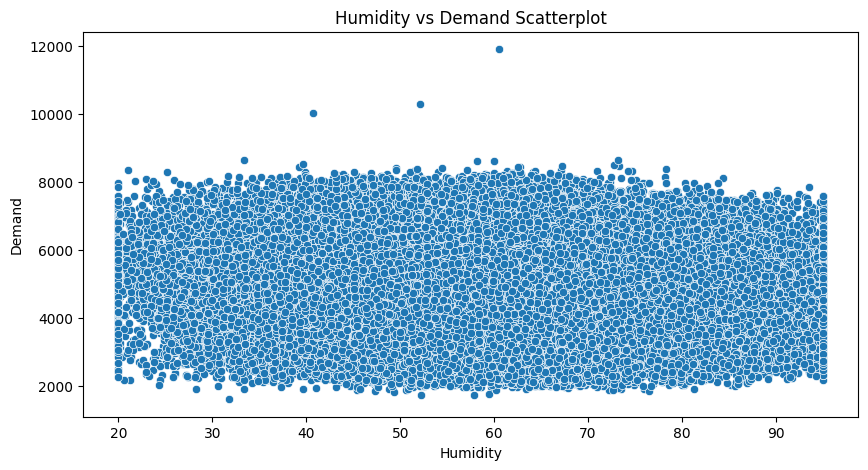

In [105]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x="Humidity", y="Demand")
plt.title("Humidity vs Demand Scatterplot")

Text(0.5, 0, 'Year')

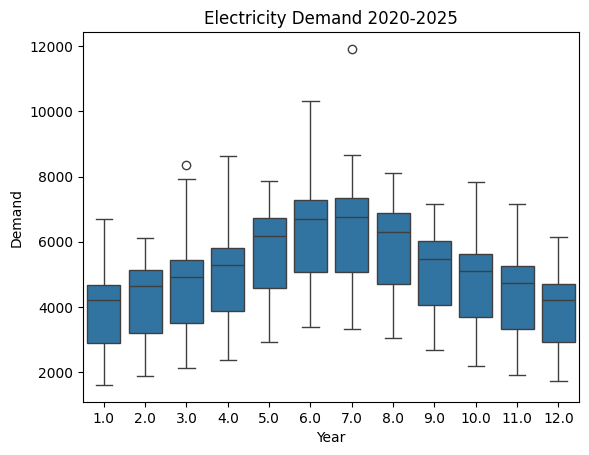

In [99]:
sns.boxplot(data=data, x="month", y="Demand")
plt.title("Electricity Demand 2020-2025")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

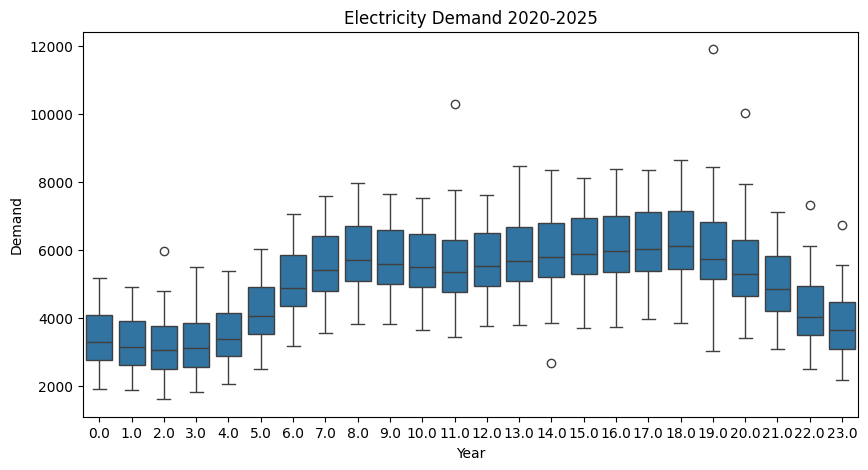

In [101]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="hour", y="Demand")
plt.title("Electricity Demand 2020-2025")
plt.xlabel("Year")

In [107]:
X=data.drop("Demand", axis=1)

In [113]:
X_train=X.loc[:"2023-12-31"]

In [114]:
X_test=X.loc["2024-01-01":]

In [117]:
X_train

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature,Humidity,Demand_Lag_1H,Demand_Lag_24H,Demand_Lag_1W,Demand_Lag_1M,Rolling_Mean_24H_(Demand),Rolling_Std_24H_(Demand)
Timestamp,,,,,,,,,,,,,,,,
2020-01-29,0.0,2.0,1.0,2020.0,29.0,5,0,1,3.000000,43.542449,2819.279885,2127.516397,2384.387255,2457.119872,3906.404017,1085.702779
2020-01-29,1.0,2.0,1.0,2020.0,29.0,5,0,1,3.000000,61.993876,2243.761393,2192.376275,2287.045228,2269.904712,3915.033718,1072.225971
2020-01-29,2.0,2.0,1.0,2020.0,29.0,5,0,1,3.910297,60.060009,2399.489086,2179.543353,2079.642713,2215.640403,3913.495193,1074.847762
2020-01-29,3.0,2.0,1.0,2020.0,29.0,5,0,1,5.757228,49.535875,2142.618772,2869.109867,2450.250827,2174.232413,3888.894196,1106.093459
2020-01-29,4.0,2.0,1.0,2020.0,29.0,5,0,1,5.807415,59.151179,2278.685918,2182.812527,2404.950579,2472.453006,3901.573764,1087.269709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19.0,6.0,12.0,2023.0,365.0,52,1,4,6.721774,46.627264,4358.938263,3894.908251,3840.654680,4403.309451,3597.790591,879.089476
2023-12-31,20.0,6.0,12.0,2023.0,365.0,52,1,4,7.557696,58.505012,4185.721624,3797.287793,4122.218903,3802.526804,3599.126925,879.430235
2023-12-31,21.0,6.0,12.0,2023.0,365.0,52,1,4,3.000000,48.001079,3829.359810,3280.602315,3307.887152,3458.566246,3604.785551,877.726873


In [118]:
X_test

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature,Humidity,Demand_Lag_1H,Demand_Lag_24H,Demand_Lag_1W,Demand_Lag_1M,Rolling_Mean_24H_(Demand),Rolling_Std_24H_(Demand)
Timestamp,,,,,,,,,,,,,,,,
2024-01-01,0.0,0.0,1.0,2024.0,1.0,1,0,1,3.000000,65.297046,2631.860751,2373.967493,2752.003113,2754.067915,3626.185642,856.204515
2024-01-01,1.0,0.0,1.0,2024.0,1.0,1,0,1,3.000000,69.068654,2720.606072,2328.972904,2419.747602,2502.925530,3640.380403,836.357296
2024-01-01,2.0,0.0,1.0,2024.0,1.0,1,0,1,3.000000,80.885372,2669.647167,1729.176090,2292.834087,2256.181729,3669.813854,776.458065
2024-01-01,3.0,0.0,1.0,2024.0,1.0,1,0,1,7.788675,66.501527,2435.578924,2257.337352,2507.704476,2486.551347,3685.801618,749.595470
2024-01-01,4.0,0.0,1.0,2024.0,1.0,1,0,1,6.607828,57.858109,2641.043699,2516.948873,2690.933257,2575.516631,3692.926651,738.736316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,1,0,4,3.956838,43.287161,5230.067391,5102.077310,5105.730509,5190.816729,4039.969992,976.961312
2024-12-31,20.0,1.0,12.0,2024.0,366.0,1,0,4,3.118824,51.705756,4689.693109,4187.844204,4673.672173,4556.916590,4045.945201,978.342615
2024-12-31,21.0,1.0,12.0,2024.0,366.0,1,0,4,3.000000,40.565916,4331.249224,3859.260701,3856.359014,4030.692288,4052.475170,977.565114


In [108]:
Y=data.Demand

In [115]:
Y_train=Y.loc[:"2023-12-31"]

In [116]:
Y_test=Y.loc["2024-01-01":]

In [119]:
Y_train

Timestamp
2020-01-29    2243.761393
2020-01-29    2399.489086
2020-01-29    2142.618772
2020-01-29    2278.685918
2020-01-29    2487.122158
                 ...     
2023-12-31    4185.721624
2023-12-31    3829.359810
2023-12-31    3416.409325
2023-12-31    3188.143951
2023-12-31    2631.860751
Name: Demand, Length: 34388, dtype: float64

In [120]:
Y_test

Timestamp
2024-01-01    2720.606072
2024-01-01    2669.647167
2024-01-01    2435.578924
2024-01-01    2641.043699
2024-01-01    2687.949643
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 8784, dtype: float64

In [126]:
x_train_shape=X_train.shape
y_train_shape=Y_train.shape

x_test_shape=X_test.shape
y_test_shape=Y_test.shape


print(f"X_train Shape: {x_train_shape}\nY_train Shape: {y_train_shape}\nX_Test Shape: {x_test_shape}\nY_Test Shape: {y_test_shape}")

X_train Shape: (34388, 16)
Y_train Shape: (34388,)
X_Test Shape: (8784, 16)
Y_Test Shape: (8784,)


In [ ]:
Training Phase

In [127]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.3 MB/s eta 0:00:45
   ---------------------------------------- 0.5/56.8 MB 1.3 MB/s eta 0:00:45
   ---------------------------------------- 0.5/56.8 MB 1.3 MB/s eta 0:00:45
    --------------------------------------- 1.0/56.8 MB 897.7 kB/s eta 0:01:03
    --------------------------------------- 1.0/56.8 MB 897.7 kB/s eta 0:01:03
    --------------------------------------- 1.3/56.8 MB 897.7 kB/s eta 0:01:02
   - -------------------------------------- 1.6/56.8 MB 896.8 kB/s eta 0:01:02
   - -------------------------------------- 1.8/56.8 MB 932.2 kB/s eta 0:00:59
   - -------------------------------------- 2.1/56.8 MB 957.5 kB/s eta 0:00:58
   - ----------

In [146]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error, mean_absolute_error

import xgboost as xgb

from xgboost import XGBRegressor

In [132]:
demand_predictive_model=XGBRegressor(
    
    n_estimators=1000,
    early_stopping_rounds=50,
    learning_rate=0.01,
    random_state=50,
    objective="reg:squarederror"
)

In [134]:
demand_predictive_model.fit(
    X_train, Y_train, eval_set=[(X_train, Y_train),(X_test, Y_test)], verbose=True
                            )

[0]	validation_0-rmse:1394.19137	validation_1-rmse:1403.08059
[1]	validation_0-rmse:1380.81010	validation_1-rmse:1389.63597
[2]	validation_0-rmse:1367.56773	validation_1-rmse:1376.32626
[3]	validation_0-rmse:1354.46052	validation_1-rmse:1363.15554
[4]	validation_0-rmse:1341.48964	validation_1-rmse:1350.11507
[5]	validation_0-rmse:1328.65290	validation_1-rmse:1337.20374
[6]	validation_0-rmse:1315.94649	validation_1-rmse:1324.41325
[7]	validation_0-rmse:1303.37384	validation_1-rmse:1311.76027
[8]	validation_0-rmse:1290.93053	validation_1-rmse:1299.23719
[9]	validation_0-rmse:1278.61643	validation_1-rmse:1286.85200
[10]	validation_0-rmse:1266.42922	validation_1-rmse:1274.60084
[11]	validation_0-rmse:1254.36494	validation_1-rmse:1262.47418
[12]	validation_0-rmse:1242.42146	validation_1-rmse:1250.47905
[13]	validation_0-rmse:1230.60352	validation_1-rmse:1238.60029
[14]	validation_0-rmse:1218.90689	validation_1-rmse:1226.84531
[15]	validation_0-rmse:1207.32768	validation_1-rmse:1215.21763
[1

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


In [138]:
predictions=demand_predictive_model.predict(X_test)

In [139]:
import numpy as np

In [140]:
sqrt_mse=np.sqrt(mean_squared_error(Y_test, predictions))


In [141]:
mae=mean_absolute_error(Y_test, predictions)


In [143]:
print(f"Square Root of Mean Squared Error: {sqrt_mse}\nMean Absolute Error: {mae}")

Square Root of Mean Squared Error: 170.5884450685328
Mean Absolute Error: 120.35029175744073


In [144]:
demand_predictive_model.save_model("Supervised_Learning_Demand_Prediction_Model.json")

In [148]:
model=xgb.XGBRegressor()
model.load_model("Supervised_Learning_Demand_Prediction_Model.json")

In [196]:
new_test=X_test

In [197]:
new_test

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature,Humidity,Demand_Lag_1H,Demand_Lag_24H,Demand_Lag_1W,Demand_Lag_1M,Rolling_Mean_24H_(Demand),Rolling_Std_24H_(Demand)
Timestamp,,,,,,,,,,,,,,,,
2024-01-01,0.0,0.0,1.0,2024.0,1.0,1.0,0.0,1.0,3.000000,65.297046,2631.860751,2373.967493,2752.003113,2754.067915,NaN,NaN
2024-01-01,1.0,0.0,1.0,2024.0,1.0,1.0,0.0,1.0,3.000000,69.068654,2720.606072,2328.972904,2419.747602,2502.925530,NaN,NaN
2024-01-01,2.0,0.0,1.0,2024.0,1.0,1.0,0.0,1.0,3.000000,80.885372,2669.647167,1729.176090,2292.834087,2256.181729,NaN,NaN
2024-01-01,3.0,0.0,1.0,2024.0,1.0,1.0,0.0,1.0,7.788675,66.501527,2435.578924,2257.337352,2507.704476,2486.551347,NaN,NaN
2024-01-01,4.0,0.0,1.0,2024.0,1.0,1.0,0.0,1.0,6.607828,57.858109,2641.043699,2516.948873,2690.933257,2575.516631,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,20.0,1.0,12.0,2024.0,366.0,1.0,0.0,4.0,3.118824,51.705756,4689.693109,4187.844204,4673.672173,4556.916590,4066.957506,25.189448
2024-12-31,21.0,1.0,12.0,2024.0,366.0,1.0,0.0,4.0,3.000000,40.565916,4331.249224,3859.260701,3856.359014,4030.692288,4067.214943,21.713651
2024-12-31,22.0,1.0,12.0,2024.0,366.0,1.0,0.0,4.0,3.000000,51.998107,4015.979957,3329.368994,3416.880872,3154.993153,4066.820039,19.089143


In [187]:
new_test.tail()

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature,Humidity,Demand_Lag_1H,Demand_Lag_24H,Demand_Lag_1W,Demand_Lag_1M,Rolling_Mean_24H_(Demand),Rolling_Std_24H_(Demand)
Timestamp,,,,,,,,,,,,,,,,
2024-12-31,20.0,1.0,12.0,2024.0,366.0,1.0,0.0,4.0,3.118824,51.705756,4689.693109,4187.844204,4673.672173,4556.916590,4066.957506,25.189448
2024-12-31,21.0,1.0,12.0,2024.0,366.0,1.0,0.0,4.0,3.000000,40.565916,4331.249224,3859.260701,3856.359014,4030.692288,4067.214943,21.713651
2024-12-31,22.0,1.0,12.0,2024.0,366.0,1.0,0.0,4.0,3.000000,51.998107,4015.979957,3329.368994,3416.880872,3154.993153,4066.820039,19.089143
2024-12-31,23.0,1.0,12.0,2024.0,366.0,1.0,0.0,4.0,6.037472,59.931925,3353.241682,3070.357487,3442.460460,2920.582506,4065.985340,18.215325
2025-01-01,0.0,2.0,1.0,2025.0,1.0,1.0,0.0,1.0,6.000000,61.000000,3219.023339,2722.480185,2756.898645,4556.916590,NaN,NaN


In [239]:
model1=xgb.XGBRegressor()

model1.load_model("Weather_Predictive_Model.json")

In [280]:
data_for_w_prediction={
"hour": [0.0],
"dayofweek": [2],
"month": [1],
"year": [2025],
"dayofyear": [1],
"weekofyear": [1],
"weekend": [0],
"quarter":[1],
"Temperature_Lagged_1H":[6.000000],
"Temperature_Lagged_1D":[3.0],
"Temperature_Lagged_1W":[7.876942944],
"Temperature_Lagged_1M":[5.626648517],
"Humidity_Lagged_1H":[61.000000],
"Humidity_Lagged_1D":[79.53629209],
"Humidity_Lagged_1W":[65.93913625],
"Humidity_Lagged_1M":[63.49488117]
}

w=pd.DataFrame(data_for_w_prediction)

In [281]:
w

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature_Lagged_1H,Temperature_Lagged_1D,Temperature_Lagged_1W,Temperature_Lagged_1M,Humidity_Lagged_1H,Humidity_Lagged_1D,Humidity_Lagged_1W,Humidity_Lagged_1M
0,0.0,2,1,2025,1,1,0,1,6.0,3.0,7.876943,5.626649,61.0,79.536292,65.939136,63.494881


In [286]:
w_prediction=model1.predict(w)

In [287]:
print(w_prediction)

[[ 5.0427876 60.46985  ]]


In [288]:

data_for_d_prediction={
"hour": [0.0],
"dayofweek": [2],
"month": [1],
"year": [2025],
"dayofyear": [1],
"weekofyear": [1],
"weekend": [0],
"quarter":[1],
"Temperature":[5.0427876],
"Humidity": [60.46985],
"Demand_Lag_1H": [3219.023339],
"Demand_Lag_24H": [2722.480185],
"Demand_Lag_1W": [2756.898645],
"Demand_Lag_1M":[4556.916590],
"Rolling_Mean_24H_(Demand)":[4065.985340],
"Rolling_Std_24H_(Demand)":[18.215325]
}


d=pd.DataFrame(data_for_d_prediction)

In [289]:
d

,hour,dayofweek,month,year,dayofyear,weekofyear,weekend,quarter,Temperature,Humidity,Demand_Lag_1H,Demand_Lag_24H,Demand_Lag_1W,Demand_Lag_1M,Rolling_Mean_24H_(Demand),Rolling_Std_24H_(Demand)
0,0.0,2,1,2025,1,1,0,1,5.042788,60.46985,3219.023339,2722.480185,2756.898645,4556.91659,4065.98534,18.215325


In [290]:
d_prediction=demand_predictive_model.predict(d)

In [291]:
print(d_prediction)

[2806.2727]
